In [1]:
from PIL import Image
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, ToPILImage
from torchvision.utils import save_image
from TrainingDataArrangement import arrange_data
from torchvision.transforms import v2
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
import os
import numpy as np
import CustomDataset
from UNetModel import UNet
import albumentations as A
from albumentations.pytorch import ToTensorV2

#defining device
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


Target path already exists. Please delete it first if you want to re-arrange the data, exiting...
Target path already exists. Please delete it first if you want to re-arrange the data, exiting...
###############ATENCAO###### FAZER UM TXT PARA O PATH DE IMAGENS, E FAZER UMA VERIFICAÇÃO TODO TREINAMENTO PARA OS PATHS INCLUSOS, OU SEJA, CRIAR OUTRO TXT E COMPARAR COM O ATUAL, DELETAR CASO FOR DIFERENTE E CRIAR UMA NOVA APPENDED FOLDER
Showing images: True
Getting the images
Converting images to tensors


C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pydantic\main.py:347: UserWarning: Pydantic serializer warnings:
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  Expected `Union[float, tuple[float, float]]` but got `list` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(
C:\Users\Gabriel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\albumentations\core\validation.py:39: UserWarning: This augmenter is very slow. Try to use ``ElasticTransformation`` instead, which is at least 10x faster.
  original_init(self, **validate

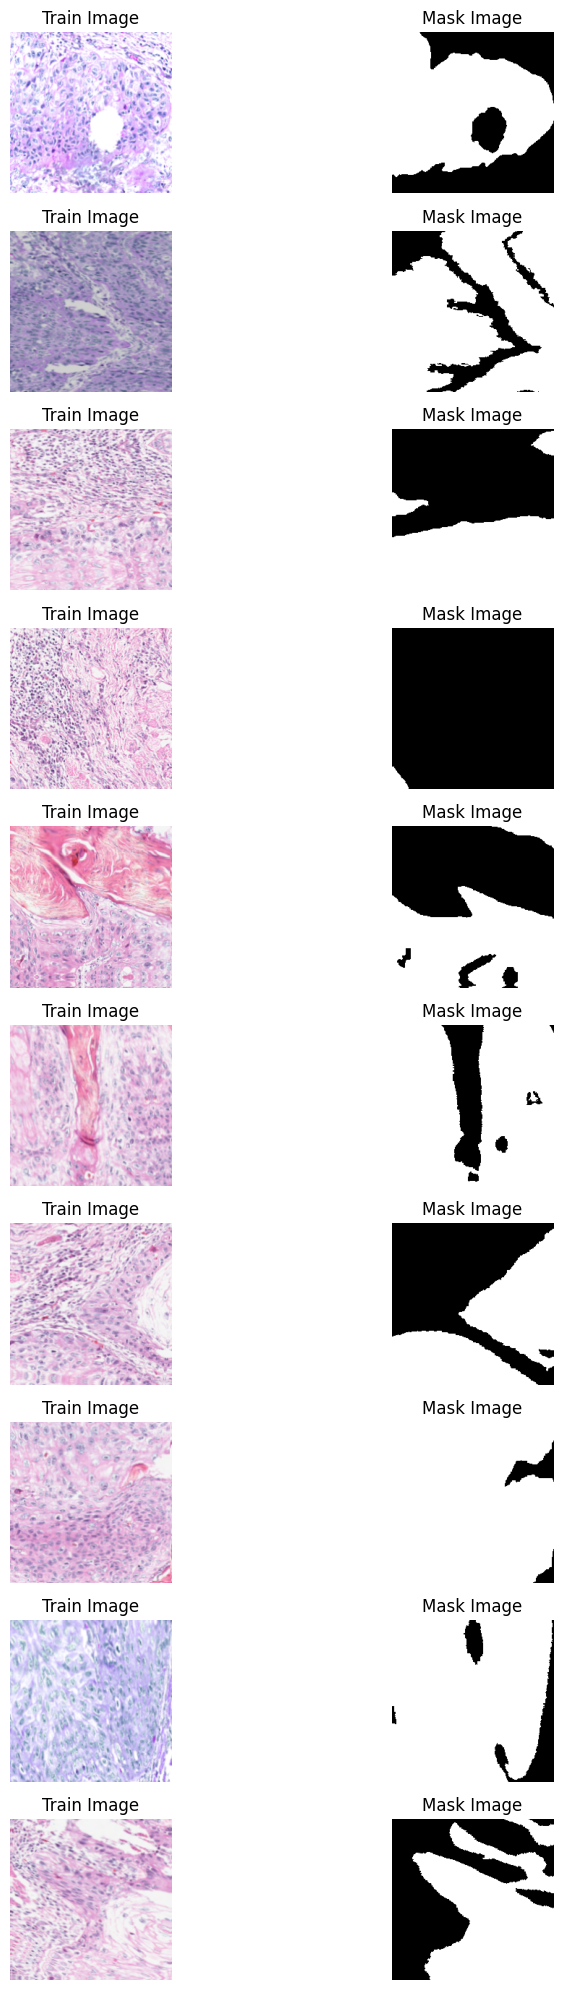

In [2]:
#getting path references
testing_folders = [
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009009\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009010x1000902\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009011\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009014\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009016x1000903\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009023\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009009\02-non_roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009010x1000902\02-non_roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009011\02-non_roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009014\02-non_roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009016x1000903\02-non_roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\testing\tumor\patch\640x640\1009023\02-non_roi"
]

training_folders = [
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009009\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009010x1000902\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009011\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009014\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009016x1000903\01-roi",
    r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009023\01-roi",
    # r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009009\02-non_roi",
    # r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009010x1000902\02-non_roi",
    # r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009011\02-non_roi",
    # r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009014\02-non_roi",
    # r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009016x1000903\02-non_roi",
    # r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\training\tumor\patch\640x640\1009023\02-non_roi"
]

updated_training_folders = []
updated_testing_folders = []

for training_folder, testing_folder in zip(training_folders, testing_folders):
    original_training_folder = training_folder + "\\01-original"
    mask_training_folder = training_folder + "\\02-mask"
    updated_training_folders.extend([original_training_folder, mask_training_folder])

    original_testing_folder = testing_folder + "\\01-original"
    mask_testing_folder = testing_folder + "\\02-mask"
    updated_testing_folders.extend([original_testing_folder, mask_testing_folder])

training_path = r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\appended_folder\training"
test_path = r"D:\Estudos\IC\DataSets\H&E-stained oral squamous cell carcinoma histological images dataset\H&E-stained oral squamous cell carcinoma histological images dataset\appended_folder\testing"

arrange_data(test_path,updated_testing_folders)
arrange_data(training_path,updated_training_folders)

#data augmentation
augmentation_transform = A.Compose([
    #A.ToPIL(),
    A.Resize(width = 256, height = 256, p=1.0),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.25),
    A.RandomRotate90(p=0.5),
    A.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    A.Transpose(p=0.5),
    A.RandomResizedCrop(224, 224, scale=(0.8, 1.0)),
    A.GridDistortion(num_steps=5, distort_limit=(-0.3, 0.3), interpolation=1, border_mode=4, p=0.3),
    A.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, p=0.3),
    A.OpticalDistortion(distort_limit=(-0.05, 0.05), shift_limit=(-0.05, 0.05), interpolation=1, border_mode=4, p=0.3),
    A.Perspective(scale=(0.05, 0.1), keep_size=True, pad_mode=0, pad_val=0, mask_pad_val=0, fit_output=False, interpolation=1, p=0.3),
    A.PiecewiseAffine (scale=(0.03, 0.05), nb_rows=4, nb_cols=4, interpolation=1, mask_interpolation=0, cval=0, cval_mask=0, mode='constant', absolute_scale=False, keypoints_threshold=0.01, p=0.1),
    A.ShiftScaleRotate (shift_limit=(-0.0625, 0.0625), scale_limit=(-0.1, 0.1), rotate_limit=(-45, 45), interpolation=1, border_mode=4, value=0, mask_value=0, rotate_method='largest_box', p=0.15),
    ToTensorV2()  # loading image to tensor and normalization
])


#custom transform for masks
print("###############ATENCAO###### FAZER UM TXT PARA O PATH DE IMAGENS, E FAZER UMA VERIFICAÇÃO TODO TREINAMENTO PARA OS PATHS INCLUSOS, OU SEJA, CRIAR OUTRO TXT E COMPARAR COM O ATUAL, DELETAR CASO FOR DIFERENTE E CRIAR UMA NOVA APPENDED FOLDER")# COLOCAR SEED//Desativar mecanismo de atencao
#Dice
# % sensibilidade e especificidade, quanto que acertou do nucleo e quanto do fundo respectivamente
show_images = True
print("Showing images:", show_images)

print("Getting the images")
training_dataset = CustomDataset.CustomImageDataset(training_path + "\\images", training_path + "\\masks", transform=augmentation_transform)
test_dataset = CustomDataset.CustomImageDataset(test_path + "\\images", test_path + "\\masks", transform=ToTensorV2())

print("Converting images to tensors")
train_dataloader = DataLoader(training_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset , batch_size=16, shuffle=True)
if(show_images):
    num_images_to_display = 10
    fig, axs = plt.subplots(num_images_to_display, 2, figsize=(10, 20))
    for i in range(num_images_to_display):
        train_image, mask_image = training_dataset[i]
        train_image = train_image.permute(1, 2, 0).numpy()

        axs[i, 0].imshow(train_image)
        axs[i, 0].set_title('Train Image')
        axs[i, 0].axis('off')

        mask_image = mask_image.squeeze(0).numpy()
        axs[i, 1].imshow(mask_image, cmap='gray')
        axs[i, 1].set_title('Mask Image')
        axs[i, 1].axis('off')

    plt.tight_layout()
    plt.show()


In [3]:
channels = 3
classes = 1
model = UNet(channels, classes)
input_data = torch.randn(1, channels, 256, 256)
output = model(input_data)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)

num_epochs = 100

#training
train_losses = []
accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, masks in tqdm(train_dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}', leave=False):
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)

        loss = F.binary_cross_entropy(outputs, masks)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        binary_predictions = (outputs > 0.5).float()
        correct_predictions += (binary_predictions == masks).sum().item()
        total_samples += masks.numel()

    epoch_loss = running_loss / len(train_dataloader)
    epoch_accuracy = correct_predictions / total_samples

    train_losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)

    print(f"Epoch {epoch + 1} Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy * 100:.2f}%")

    model.eval()
    val_running_loss = 0.0
    val_correct_predictions = 0
    val_total_samples = 0

    with torch.no_grad():
        for val_images, val_masks in test_dataloader:
            val_images, val_masks = val_images.to(device), val_masks.to(device)
            val_outputs = model(val_images)

            val_loss = F.binary_cross_entropy(val_outputs, val_masks)
            val_running_loss += val_loss.item()

            val_binary_predictions = (val_outputs > 0.5).float()
            val_correct_predictions += (val_binary_predictions == val_masks).sum().item()
            val_total_samples += val_masks.numel()

    val_epoch_loss = val_running_loss / len(test_dataloader)
    val_epoch_accuracy = val_correct_predictions / val_total_samples

    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_accuracy)

    print(f"Epoch {epoch + 1} Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy * 100:.2f}%")
    if(show_images):
        with torch.no_grad():
            for images, masks in test_dataloader:
                images, masks = images.to(device), masks.to(device)

                if torch.any(masks > 0):
                    outputs = model(images)
                    probs = outputs

                    images_np = images.cpu().numpy()
                    masks_np = masks.cpu().numpy()
                    probs_np = probs.cpu().numpy()

                    threshold = 0.5
                    preds_np = (probs_np > threshold).astype(np.uint8)
                    preds_np_squeezed = np.squeeze(preds_np, axis=1) 

                    plt.figure(figsize=(16, 4))

                    plt.subplot(1, 2, 1)
                    plt.imshow(images_np[0].transpose((1, 2, 0)))
                    plt.imshow(masks_np[0, 0], alpha=0.5, cmap='jet')
                    plt.title("Original Image with Ground Truth Mask")
                    plt.axis('off')

                    plt.subplot(1, 2, 2)
                    plt.imshow(images_np[0].transpose((1, 2, 0)))
                    plt.imshow(preds_np_squeezed[0], alpha=0.5, cmap='jet')
                    plt.title("Original Image with Predicted Mask")
                    plt.axis('off')

                    plt.show()

                    break




Epoch 1 Loss: 0.6552, Accuracy: 59.96%


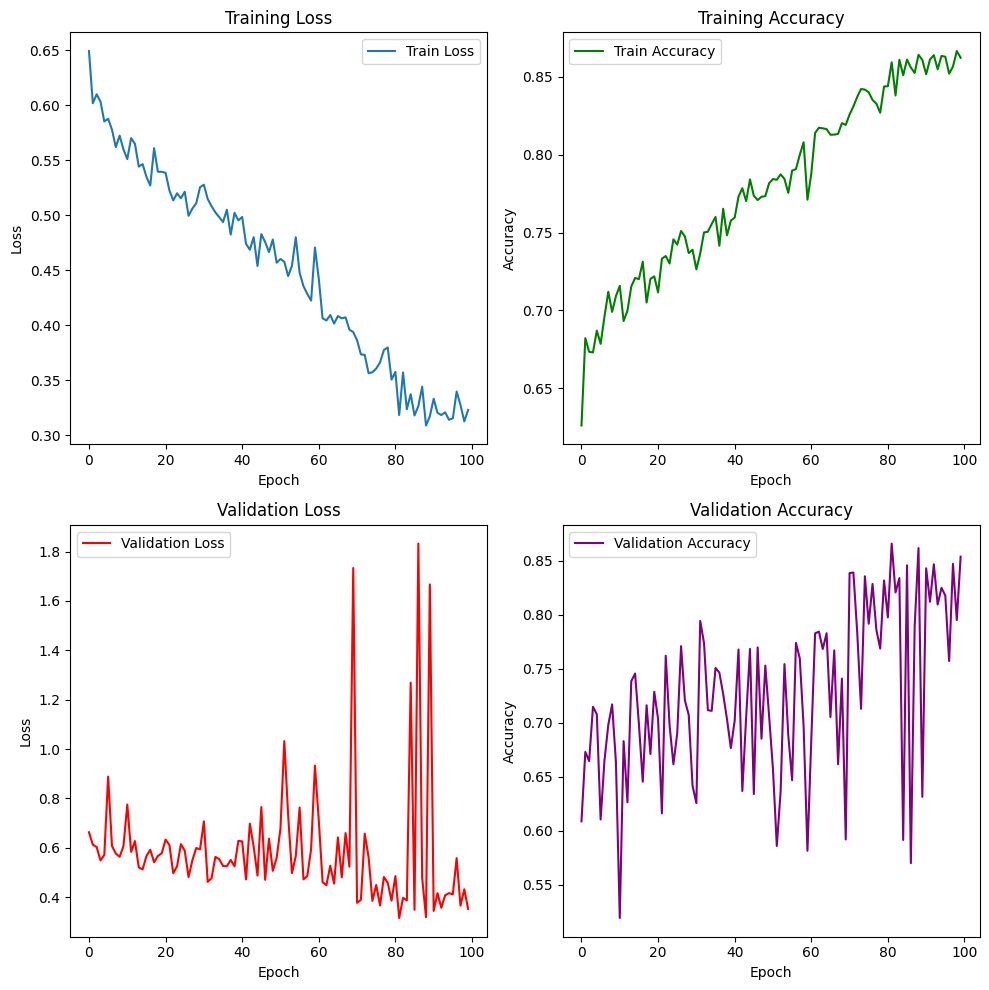

In [ ]:
# Plotting training and validation metrics
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(accuracies, label='Train Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(val_losses, label='Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(val_accuracies, label='Validation Accuracy', color='purple')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

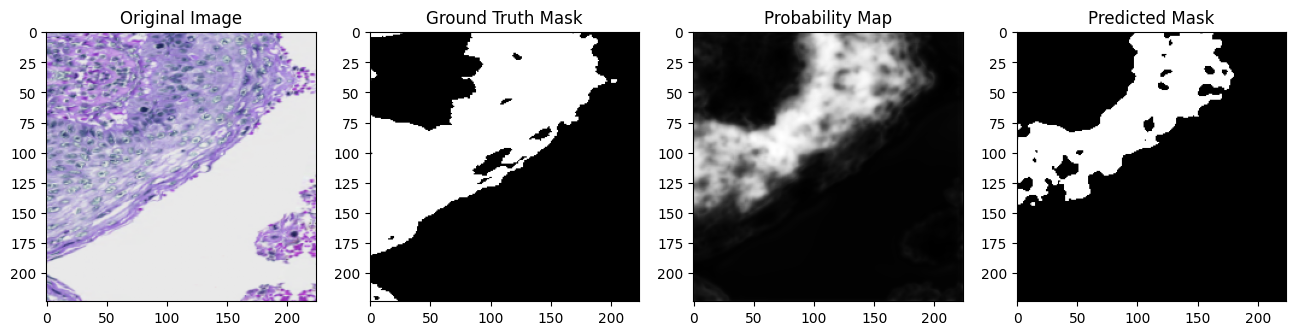

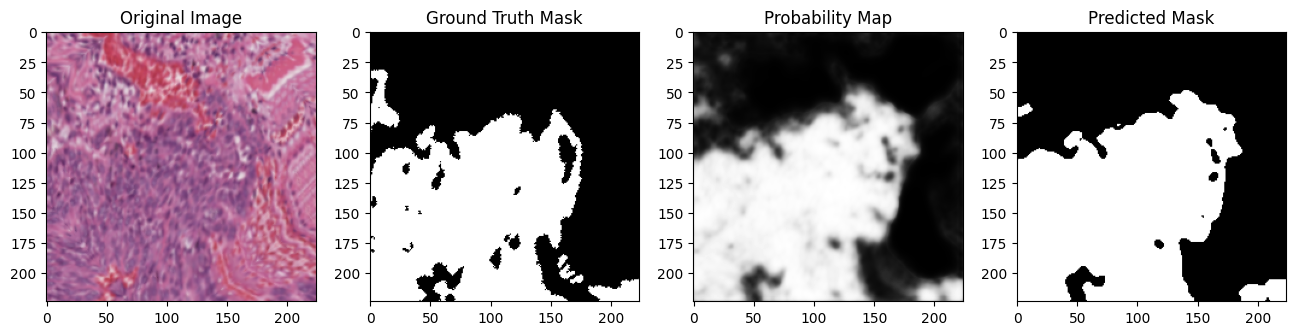

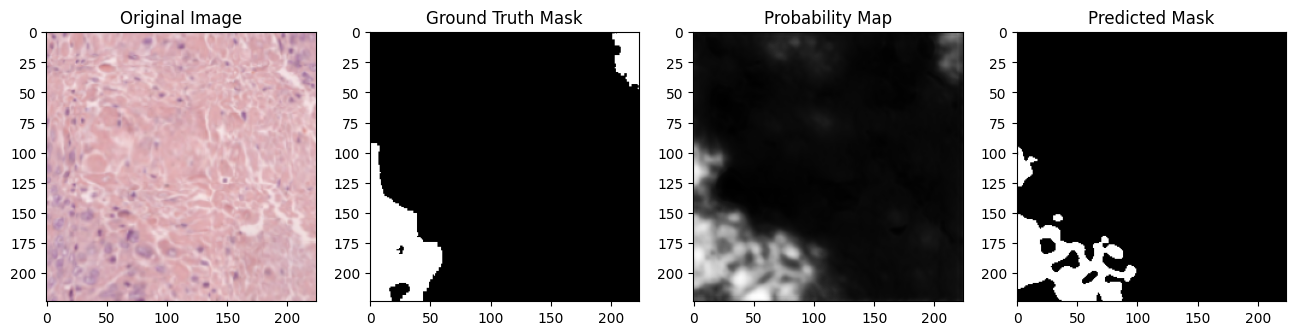

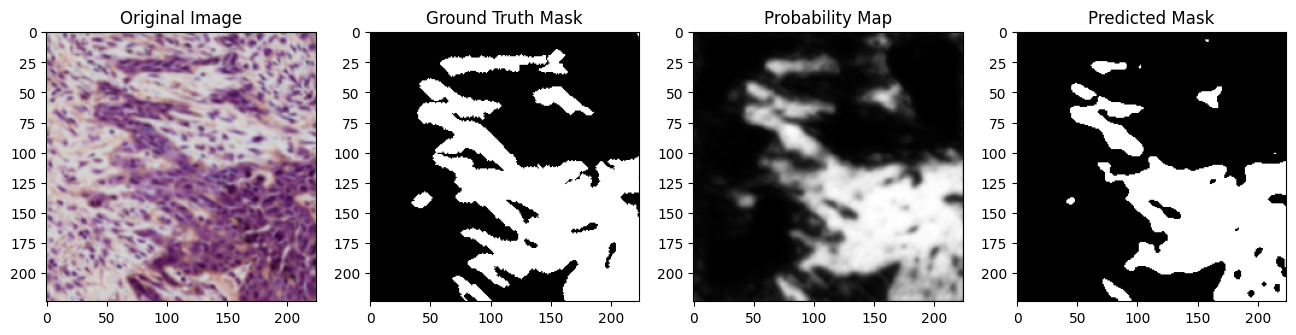

In [ ]:
import torch.nn.functional as F
if(show_images):
    with torch.no_grad():
        counter = 0
        for images, masks in test_dataloader:
            images, masks = images.to(device), masks.to(device)
            images_normalized = images

            outputs = model(images_normalized)
            probs = outputs
            #probs = F.softmax(outputs, dim=1)



            images_np = images_normalized.cpu().numpy()
            masks_np = masks.cpu().numpy()
            probs_np = probs.cpu().numpy()

            threshold = 0.5
            preds_np = (probs_np > threshold).astype(np.uint8)
            preds_np_squeezed = np.squeeze(preds_np, axis=1) 


            # print("Shapes:")
            # print("images_np:", images_np.shape)
            # print("masks_np:", masks_np.shape)
            # print("probs_np:", probs_np.shape)
            # print("preds_np:", preds_np.shape)

            # print("Value Ranges:")
            # print("images_np - min:", images_np.min(), "max:", images_np.max())
            # print("masks_np - min:", masks_np.min(), "max:", masks_np.max())
            # print("probs_np - min:", probs_np.min(), "max:", probs_np.max())
            # print("preds_np - min:", preds_np.min(), "max:", preds_np.max())

            plt.figure(figsize=(16, 4))

            plt.subplot(1, 4, 1)
            plt.imshow(images_np[0].transpose((1, 2, 0)))
            plt.title("Original Image")

            plt.subplot(1, 4, 2)
            plt.imshow(masks_np[0, 0], cmap='gray')
            plt.title("Ground Truth Mask")

            plt.subplot(1, 4, 3)
            plt.imshow(probs_np[0, 0], cmap='gray')
            plt.title("Probability Map")

            plt.subplot(1, 4, 4)
            plt.imshow(preds_np_squeezed[0], cmap='gray')
            plt.title("Predicted Mask")

            plt.show()

            counter += 1
            if counter == 10:
                break